# Project 4 : Kaggle West Nile Virus

----------

## Contents:
### Part 1b Weather Data Cleaning & Exploratory Data Analysis(EDA)

1. [Importing Libraries](#1.-Importing-Libraries)
2. [Importing Data](#2.-Importing-Data)
3. [Data Cleaning](#3.-Data-Cleaning)
-------

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display full output 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

## 2. Importing Data

In [2]:
weather = pd.read_csv('./assets/weather.csv')

In [3]:
weather.shape

(2944, 22)

## 3. Data Cleaning

<b>Weather Data</b>:
- Renamed the weather data columns into snake-case for naming convention
- Turned date column from string object to datetime64
- Replaced 'M' & '-' values as np.nan
- Dropped water1, snowfall, codesum & depth variables due to high missing values & meaningless variables.
- Imputed missing values for daily average temperature tavg with average of tmax and tmin and calculated missing values for cool and heat by subtracting tavg from base 65 F
- Imputed 'T' or trace values as 0.005
- Transformed all features except date, codesum and station into float values
- Imputed missing values for wetbulb, preciptotal, stnpressure, sealevel, avgspeed using median value
- Imputed sunrise and sunset for station 2 with station 1 values using 'forward fill' method
- Imputed depart for station 2 with station 1 values using 'forward fill' method
- Split and recombined CodeSum to create proper spacing between different codes
- Created new variables indicate rainy, snowy, windy and misty weather phenomena based on codesum and dropped low count variable/snowy & windy weather
- Merged stations 1 & 2 on date, sunrise & sunset
- Added year, month and day features

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [5]:
weather.head(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,-,-,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,0444,1852,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,0443,1853,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,-,-,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [6]:
weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [7]:
weather[weather.duplicated()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed


<b>Observation<b/> : 

1. Weather data columns has to be renamed into snake-case for naming convention.
2. Date column need to change to datetime64 format.
3. No missing values based on initial inspection and duplicates values. However, based on QC document, missing data is represented with 'M' or '-' and trace value is represented with 'T'. We will replace 'M' & '-' values as np.nan for now so that we can detect them.
4. <b>CodeSum</b> contain empty string which represent normal weather based on QC document.
5. The dtypes of some features are incorrect for their representative data. For example: <b>Tavg, Depart, WetBulb, Heat, Cool</b> and etc. We will convert all features except <b>Date, CodeSum, Sunset, Sunrise and Station</b>, values to float type for better analysis.

#### a) Renamed the weather data columns into snake-case for naming convention

In [8]:
# Renaming the weather dataset columns into snake-case for naming convention

weather.columns = weather.columns.str.lower()

#### b) Turn date column from string object to datetime64

In [9]:
weather['date'] = pd.to_datetime(weather['date'])

#### c) Replace 'M' & '-' values as np.nan

In [10]:
weather.replace('M', np.nan, inplace = True)
weather.replace('-', np.nan, inplace = True)

#### d) Dropped water1, snowfall & depth variables due to high missing values

In [11]:
# Define Function to create missing value dataframe 

def missing_val(df):
    
    df_miss = df.isna().sum().reset_index()
    df_miss.columns = ['features', 'miss_val']
    df_miss['percent'] = round((df_miss['miss_val'] / df.shape[0] * 100 ), 2)
    df_miss = df_miss[df_miss['miss_val'] != 0].sort_values('miss_val', ascending = False)
    
    # Total number of features with missing values
    print(f'\nTotal number of features with missing values: {df_miss.shape[0]}\n')
    return df_miss

In [12]:
missing_val(weather)


Total number of features with missing values: 14



,features,miss_val,percent
14,water1,2944,100.00
5,depart,1472,50.00
10,sunrise,1472,50.00
11,sunset,1472,50.00
13,depth,1472,50.00
15,snowfall,1472,50.00
4,tavg,11,0.37
8,heat,11,0.37
9,cool,11,0.37
18,sealevel,9,0.31


In [13]:
weather.isin(['  T']).sum()[weather.isin(['  T']).sum()> 0].sort_values(ascending = False)

preciptotal    318
snowfall        12
dtype: int64

In [14]:
weather.isin(['0.0']).sum()[weather.isin(['0.0']).sum()> 0].sort_values(ascending = False)

snowfall    1459
dtype: int64

In [15]:
weather.isin(['0']).sum()[weather.isin(['0']).sum()> 0].sort_values(ascending = False)

heat     1870
depth    1472
dtype: int64

<b>Observation<b/> : 

1. <b>water1, snowfall & depth</b> variables have too many missing values so we decided to drop the variables.
2. <b>depart, sunrise & sunset</b> values of station 2 are missing/ not available. We will impute <b>depart, sunrise & sunset</b> of station 2 with station 1 values using 'forward fill' method since the date of last valid observation(station 1) before missing value(station 2) is same. 
3. <b>tavg, heat & cool</b> variables have 11 missing values only, we will impute the missing values.
4. <b>sealevel, wetbulb, stnpressure, avgspeed & preciptotal</b> variables have less than 0.5% of missing value only, we will impute the missing values with either median, mean or mode after exploration.
5. <b>preciptotal</b> variable has 318 trace values. According to meteorologist, the amount of precipitation, such as rain or snow, that is greater than zero but less than 0.01 inch of rain is reported as trace value. The lowest value in <b>preciptotal</b> is 0 and the second lowest is 0.01, we will choose the median 0.005 and replace the trace values.

In [16]:
weather.drop(columns = ['water1', 'snowfall', 'depth'], inplace = True)

#### e) Imputed missing values for daily average temperature tavg with average of tmax and tmin and calculated missing values for cool and heat by subtracting tavg from base 65 F

In [17]:
# Function to impute Average Temperature, Cooling and Heating Degrees
def impute_temp_heat_cool(row):
    
    # Impute missing values for Tavg
    if row['tavg'] is np.nan:
        row['tavg'] = round((row['tmax'] + row['tmin'])/2)
        
    # Impute missing values for Cool and Warm with degree Base 65F as per document
    if row['heat'] is np.nan or row['cool'] is np.nan:
        
        impute_val = 65 - row['tavg']
        
        if impute_val < 0:
            row['cool'] = -impute_val
            row['heat'] = 0
        
        elif impute_val > 0:
            row['heat'] = impute_val
            row['cool'] = 0
            
        else:
            row['heat'] = row['cool'] = 0
    
    return row

In [18]:
weather = weather.apply(impute_temp_heat_cool, axis = 1)

In [19]:
weather.head(10)

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,NaN,51,57,0,3,NaN,NaN,,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,NaN,42,47,13,0,NaN,NaN,BR HZ,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,NaN,40,50,7,0,NaN,NaN,HZ,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,0444,1852,RA,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,64,NaN,42,50,1,0,NaN,NaN,,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,0443,1853,,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,NaN,39,50,5,0,NaN,NaN,,T,29.46,30.09,11.2,7,11.5


#### f) Imputed 'T' or trace values as 0.005

In [20]:
weather.replace('  T', 0.005, inplace = True)

#### g) Transformed all features except date, codesum and station into float values

In [21]:
float_cols = [col for col in weather.columns if col not in ['date', 'codesum', 'station']]

weather[float_cols] = weather[float_cols].astype('float')

#### h) Imputed missing values for wetbulb, preciptotal, stnpressure, sealevel, avgspeed using median value

##### wetbulb

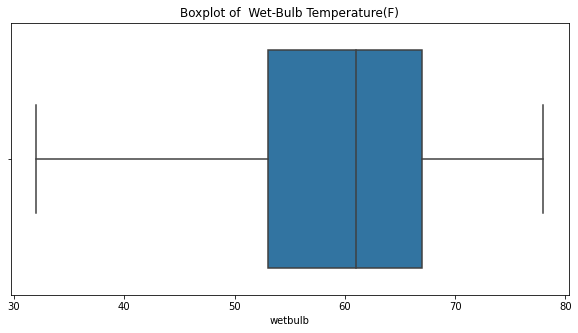

In [22]:
plt.figure(figsize = (10,5))
sns.boxplot(data = weather, x = 'wetbulb')
plt.title("Boxplot of  Wet-Bulb Temperature(F)")
plt.show()

In [23]:
weather['wetbulb'].describe()

count    2940.000000
mean       59.310884
std         9.286742
min        32.000000
25%        53.000000
50%        61.000000
75%        67.000000
max        78.000000
Name: wetbulb, dtype: float64

<b>Observation<b/> : 

1. Based on the <b>wetbulb</b> variable boxplot, most of the values are between 53 - 67 with 61 as median. Also, the descriptive statistics show the mean value of <b>wetbulb</b> is 59 which is quite close to median. In this case, we will use median to fill in the null values.

In [24]:
weather['wetbulb'] = weather['wetbulb'].fillna(weather['wetbulb'].median())

##### preciptotal

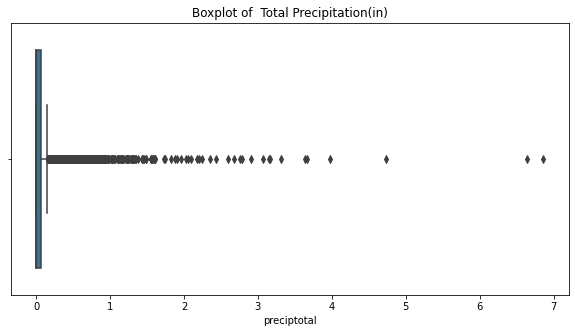

In [25]:
plt.figure(figsize = (10,5))
sns.boxplot(data = weather, x = 'preciptotal')
plt.title("Boxplot of  Total Precipitation(in)")
plt.show()

In [26]:
weather['preciptotal'].describe()

count    2942.000000
mean        0.131869
std         0.393150
min         0.000000
25%         0.000000
50%         0.000000
75%         0.060000
max         6.860000
Name: preciptotal, dtype: float64

<b>Observation<b/> : 

1. Based on the <b>preciptotal</b> variable boxplot, there are a lot of outliers. Most of the values are between 0 - 0.06 with 0 as median. However, the descriptive statistics show the mean value of <b>preciptotal</b> is 0.13 which is very far from median. In this case, we will use median to fill in the null values.

In [27]:
weather['preciptotal'] = weather['preciptotal'].fillna(weather['preciptotal'].median())

##### sealevel

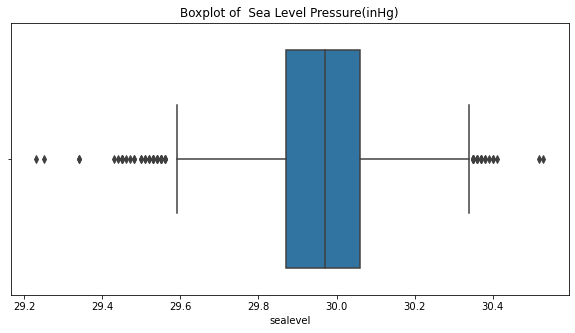

In [28]:
plt.figure(figsize = (10,5))
sns.boxplot(data = weather, x = 'sealevel')
plt.title("Boxplot of  Sea Level Pressure(inHg)")
plt.show()

In [29]:
weather['sealevel'].describe()

count    2935.000000
mean       29.968129
std         0.158597
min        29.230000
25%        29.870000
50%        29.970000
75%        30.060000
max        30.530000
Name: sealevel, dtype: float64

<b>Observation<b/> : 

1. Based on the <b>sealevel</b> variable boxplot, there are a number of outliers. Most of the values are between 29.8 - 30 with 29.9 as median. Also, the descriptive statistics show the mean value of <b>sealevel</b> is 29.9 which is same as median. In this case, we will use median to fill in the null values.

In [30]:
weather['sealevel'] = weather['sealevel'].fillna(weather['sealevel'].median())

##### stnpressure

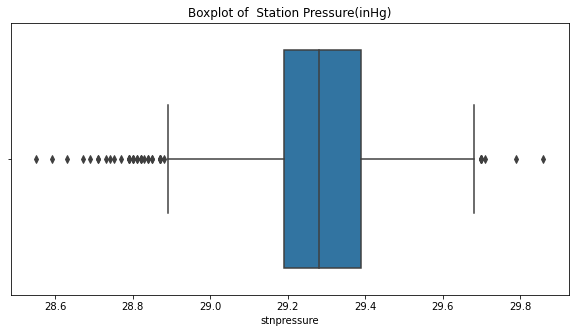

In [31]:
plt.figure(figsize = (10,5))
sns.boxplot(data = weather, x = 'stnpressure')
plt.title("Boxplot of  Station Pressure(inHg)")
plt.show()

In [32]:
weather['stnpressure'].describe()

count    2940.000000
mean       29.284429
std         0.158543
min        28.550000
25%        29.190000
50%        29.280000
75%        29.390000
max        29.860000
Name: stnpressure, dtype: float64

<b>Observation<b/> : 

1. Based on the <b>stnpressure</b> variable boxplot, there are a number of outliers. Most of the values are between 28.5 - 29.3 with 29.2 as median. Also, the descriptive statistics show the mean value of <b>stnpressure</b> is 29.2 which is same as median. In this case, we will use median to fill in the null values.

In [33]:
weather['stnpressure'] = weather['stnpressure'].fillna(weather['stnpressure'].median())

##### avgspeed

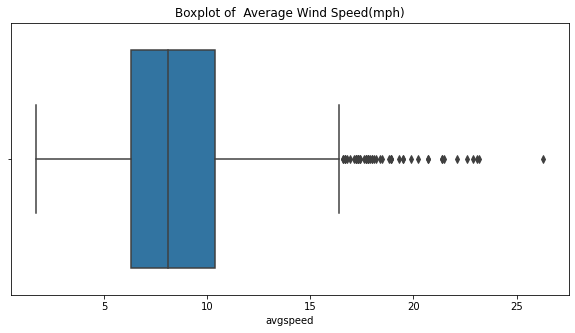

In [34]:
plt.figure(figsize = (10,5))
sns.boxplot(data = weather, x = 'avgspeed')
plt.title("Boxplot of  Average Wind Speed(mph)")
plt.show()

In [35]:
weather['avgspeed'].describe()

count    2941.000000
mean        8.580449
std         3.147300
min         1.700000
25%         6.300000
50%         8.100000
75%        10.400000
max        26.300000
Name: avgspeed, dtype: float64

<b>Observation<b/> : 

1. Based on the <b>avgspeed</b> variable boxplot, there are a number of outliers. Most of the values are between 6.3 - 10.4 with 8.1 as median. Also, the descriptive statistics show the mean value of <b>avgspeed</b> is 8.5 which isvery close to median. In this case, we will use median to fill in the null values.

In [36]:
weather['avgspeed'] = weather['avgspeed'].fillna(weather['avgspeed'].median())

#### i) Imputed Sunrise and Sunset for Station 2 with Station 1 values using 'forward fill' method

In [37]:
weather['sunrise'].fillna(method = 'ffill', inplace = True)
weather['sunset'].fillna(method = 'ffill', inplace = True)

#### j) Imputed Depart for Station 2 with Station 1 values using 'forward fill' method

In [38]:
weather['depart'].fillna(method = 'ffill', inplace = True)

In [39]:
missing_val(weather)


Total number of features with missing values: 0



,features,miss_val,percent


In [40]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   float64       
 3   tmin         2944 non-null   float64       
 4   tavg         2944 non-null   float64       
 5   depart       2944 non-null   float64       
 6   dewpoint     2944 non-null   float64       
 7   wetbulb      2944 non-null   float64       
 8   heat         2944 non-null   float64       
 9   cool         2944 non-null   float64       
 10  sunrise      2944 non-null   float64       
 11  sunset       2944 non-null   float64       
 12  codesum      2944 non-null   object        
 13  preciptotal  2944 non-null   float64       
 14  stnpressure  2944 non-null   float64       
 15  sealevel     2944 non-null   float64       
 16  result

#### k) Split and recombined CodeSum to create proper spacing between different codes

In [41]:
# Ensuring that each code has proper spacing

codes = ['+FC','FC', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL',
         'IC', 'FG+', 'FG', 'BR', 'UP', 'HZ', 'FU', 'VA', 'DU', 'DS',
         'PO', 'SA', 'SS', 'PY', 'SQ', 'DR', 'SH', 'FZ', 'MI', 'PR',
         'BC', 'BL', 'VC']

weather['codesum'] = weather['codesum'].apply(lambda x: ' '.join([t for t in x.split(' ') if t in codes]))

In [42]:
weather['codesum'].unique()

array(['', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'RA HZ', 'RA BR HZ',
       'BR HZ FU', 'RA HZ FU', 'TS RA BR HZ', 'DZ BR', 'TS BR HZ',
       'RA DZ BR HZ', 'TS RA BR', 'TS RA', 'TS BR', 'RA DZ FG+ BR',
       'RA FG+ BR', 'RA DZ', 'RA DZ BR', 'TS RA HZ', 'RA FG+ FG BR',
       'DZ FG+ FG BR HZ', 'RA BR SQ', 'TS', 'FG+ BR HZ', 'RA SN',
       'DZ BR HZ', 'RA BR FU', 'DZ', 'FG+ BR', 'FG+ FG BR', 'RA FG BR',
       'RA DZ SN', 'FG+ FG BR HZ', 'TS RA FG BR', 'TS RA FG+ FG BR',
       'RA DZ FG+ FG BR', 'FU', 'TS HZ', 'TS GR RA BR', 'HZ FU',
       'RA BR HZ FU', 'RA FG+ FG BR HZ', 'FG+', 'BR SQ', 'FG BR HZ',
       'TS RA FG BR HZ', 'RA DZ FG+ BR HZ', 'RA SN BR'], dtype=object)

<b>Observation<b/> : 

1. '+FC', 'FC', 'UP', 'VA', 'SA', 'PY', 'PR' are not present in our data so will not be using. 'VC' doesn't indicate what kind of weather within vicinity. We will create dummy variables indicate rainy, snowy, windy and misty conditions.
2. Based on QC documents, empty string represent normal weather.

#### l) Created new variables indicate rainy, snowy, windy and misty weather phenomena based on codesum and dropped low count variable/snowy & windy weather

In [43]:
# create new variabless indicate rainy, snowy, windy and misty conditions 

weather['rain'] = np.where(weather['codesum'].str.contains("|".join(['TS', 'RA', 'DZ', 'SH'])), 1, 0)
weather['snow'] = np.where(weather['codesum'].str.contains("|".join(['SN', 'SG', 'GS', 'PL', 'IC', 'DR', 'FZ', 'BC', 'GR'])), 1, 0)
weather['wind'] = np.where(weather['codesum'].str.contains("|".join(['SQ', 'DS', 'SS', 'PO', 'BL', 'DU'])), 1, 0)
weather['mist'] = np.where(weather['codesum'].str.contains("|".join(['BR', 'HZ', 'MI', 'FG', 'FG+', 'FU'])), 1, 0)

In [44]:
weather.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,rain,snow,wind,mist
0,1,2007-05-01,83.0,50.0,67.0,14.0,51.0,56.0,0.0,2.0,448.0,1849.0,,0.0,29.10,29.82,1.7,27.0,9.2,0,0,0,0
1,2,2007-05-01,84.0,52.0,68.0,14.0,51.0,57.0,0.0,3.0,448.0,1849.0,,0.0,29.18,29.82,2.7,25.0,9.6,0,0,0,0
2,1,2007-05-02,59.0,42.0,51.0,-3.0,42.0,47.0,14.0,0.0,447.0,1850.0,BR,0.0,29.38,30.09,13.0,4.0,13.4,0,0,0,1
3,2,2007-05-02,60.0,43.0,52.0,-3.0,42.0,47.0,13.0,0.0,447.0,1850.0,BR HZ,0.0,29.44,30.08,13.3,2.0,13.4,0,0,0,1
4,1,2007-05-03,66.0,46.0,56.0,2.0,40.0,48.0,9.0,0.0,446.0,1851.0,,0.0,29.39,30.12,11.7,7.0,11.9,0,0,0,0


In [45]:
weather[['rain', 'snow', 'wind', 'mist']].sum()

rain    1007
snow       7
wind       3
mist     883
dtype: int64

<b>Observation<b/> : 

1. <b>snow & wind</b> has low count, so decided to drop the variables. Also, because warm and moist weather is mosquito's friend.
2. <b>codesum</b> variable can be dropped.

In [46]:
weather.drop(columns = ['codesum', 'snow','wind'], inplace = True)

In [47]:
weather.reset_index(drop = True)

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,rain,mist
0,1,2007-05-01,83.0,50.0,67.0,14.0,51.0,56.0,0.0,2.0,448.0,1849.0,0.000,29.10,29.82,1.7,27.0,9.2,0,0
1,2,2007-05-01,84.0,52.0,68.0,14.0,51.0,57.0,0.0,3.0,448.0,1849.0,0.000,29.18,29.82,2.7,25.0,9.6,0,0
2,1,2007-05-02,59.0,42.0,51.0,-3.0,42.0,47.0,14.0,0.0,447.0,1850.0,0.000,29.38,30.09,13.0,4.0,13.4,0,1
3,2,2007-05-02,60.0,43.0,52.0,-3.0,42.0,47.0,13.0,0.0,447.0,1850.0,0.000,29.44,30.08,13.3,2.0,13.4,0,1
4,1,2007-05-03,66.0,46.0,56.0,2.0,40.0,48.0,9.0,0.0,446.0,1851.0,0.000,29.39,30.12,11.7,7.0,11.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49.0,40.0,45.0,-4.0,34.0,42.0,20.0,0.0,620.0,1650.0,0.000,29.42,30.07,8.5,29.0,9.0,0,0
2940,1,2014-10-30,51.0,32.0,42.0,-4.0,34.0,40.0,23.0,0.0,622.0,1649.0,0.000,29.34,30.09,5.1,24.0,5.5,0,0
2941,2,2014-10-30,53.0,37.0,45.0,-4.0,35.0,42.0,20.0,0.0,622.0,1649.0,0.005,29.41,30.10,5.9,23.0,6.5,1,0
2942,1,2014-10-31,47.0,33.0,40.0,-6.0,25.0,33.0,25.0,0.0,623.0,1647.0,0.030,29.49,30.20,22.6,34.0,22.9,1,0


#### m) Merged stations 1 & 2 on date, sunrise & sunset

In [48]:
weather = weather.groupby(['date','sunrise','sunset']).sum() / 2
weather = weather.drop(columns=['station']).reset_index()

In [49]:
weather.head()

,date,sunrise,sunset,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,rain,mist
0,2007-05-01,448.0,1849.0,83.5,51.0,67.5,14.0,51.0,56.5,0.0,2.5,0.0000,29.140,29.820,2.20,26.0,9.40,0.0,0.0
1,2007-05-02,447.0,1850.0,59.5,42.5,51.5,-3.0,42.0,47.0,13.5,0.0,0.0000,29.410,30.085,13.15,3.0,13.40,0.0,1.0
2,2007-05-03,446.0,1851.0,66.5,47.0,57.0,2.0,40.0,49.0,8.0,0.0,0.0000,29.425,30.120,12.30,6.5,12.55,0.0,0.5
3,2007-05-04,444.0,1852.0,72.0,50.0,61.0,4.0,41.5,50.0,4.0,0.0,0.0025,29.335,30.045,10.25,7.5,10.60,0.5,0.0
4,2007-05-05,443.0,1853.0,66.0,53.5,60.0,5.0,38.5,49.5,5.0,0.0,0.0050,29.430,30.095,11.45,7.0,11.75,0.0,0.0


#### n) Added year, month and day features

In [50]:
weather['year'] = weather['date'].apply(lambda x: x.year)
weather['month'] = weather['date'].apply(lambda x: x.month)
weather['day'] = weather['date'].apply(lambda x: x.day)

In [51]:
weather.to_pickle('./data/weather.pk1')